# Import of libraries

In [1]:
#libraries
import pandas as pd
from google.colab import drive
from shutil import copyfile
import seaborn as sns
import matplotlib as plt

In [2]:
#import del drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Analysis of the dataset 'articles.csv'

## Import of the dataset

In [3]:
#import of the csv file

path_articles = 'gdrive/My Drive/Artificial_intelligence_project_UA/Data/articles.csv'
copyfile(path_articles, 'articles.csv')
articles = pd.read_csv('articles.csv')
articles = pd.DataFrame(articles)

In [4]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


## Controls on the data

In [5]:
#control that there is any missing value
articles.isna().any()

article_id                      False
product_code                    False
prod_name                       False
product_type_no                 False
product_type_name               False
product_group_name              False
graphical_appearance_no         False
graphical_appearance_name       False
colour_group_code               False
colour_group_name               False
perceived_colour_value_id       False
perceived_colour_value_name     False
perceived_colour_master_id      False
perceived_colour_master_name    False
department_no                   False
department_name                 False
index_code                      False
index_name                      False
index_group_no                  False
index_group_name                False
section_no                      False
section_name                    False
garment_group_no                False
garment_group_name              False
detail_desc                      True
dtype: bool

In [6]:
#number of missing values for each column in the dataset
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [7]:
#maximum value of each numerical column in the dataset
articles.max(numeric_only = True)

article_id                    959461001
product_code                     959461
product_type_no                     762
graphical_appearance_no         1010029
colour_group_code                    93
perceived_colour_value_id             7
perceived_colour_master_id           20
department_no                      9989
index_group_no                       26
section_no                           97
garment_group_no                   1025
dtype: int64

In [8]:
#minimum value of each numerical column in the dataset
articles.min(numeric_only = True)

article_id                    108775015
product_code                     108775
product_type_no                      -1
graphical_appearance_no              -1
colour_group_code                    -1
perceived_colour_value_id            -1
perceived_colour_master_id           -1
department_no                      1201
index_group_no                        1
section_no                            2
garment_group_no                   1001
dtype: int64

In [9]:
#number of rows with product no equal to -1
prod_no = articles[articles['product_type_no'] == -1]['product_type_no'].value_counts()
perc_prod_no = (prod_no/len(articles)) * 100

print('The number of rows with value -1 of the column product_type_no is', prod_no)
print('The percentage of this values is', perc_prod_no)

The number of rows with value -1 of the column product_type_no is -1    121
Name: product_type_no, dtype: int64
The percentage of this values is -1    0.114646
Name: product_type_no, dtype: float64


In [10]:
#number of rows with graphical appearance no equal to -1
graph_app = articles[articles['graphical_appearance_no'] == -1]['graphical_appearance_no'].value_counts()
perc_graph_app = (graph_app/len(articles)) * 100

print('The number of rows with value -1 of the column graphical_appearance_no is', graph_app)
print('The percentage of this values is', perc_graph_app)

The number of rows with value -1 of the column graphical_appearance_no is -1    52
Name: graphical_appearance_no, dtype: int64
The percentage of this values is -1    0.049269
Name: graphical_appearance_no, dtype: float64


In [11]:
#number of rows with colour group code equal to -1
col_gr = articles[articles['colour_group_code'] == -1]['colour_group_code'].value_counts()
perc_col_gr = (col_gr/len(articles)) * 100

print('The number of rows with value -1 of the column colour_group_code is', col_gr)
print('The percentage of this values is', perc_col_gr)

The number of rows with value -1 of the column colour_group_code is -1    28
Name: colour_group_code, dtype: int64
The percentage of this values is -1    0.02653
Name: colour_group_code, dtype: float64


In [12]:
#number of rows with perceived colour value id equal to -1
per_col_id = articles[articles['perceived_colour_value_id'] == -1]['perceived_colour_value_id'].value_counts()
perc_per_col_id = (per_col_id/len(articles)) * 100

print('The number of rows with value -1 of the column perceived_colour_value_id is', per_col_id)
print('The percentage of this values is', perc_per_col_id)

The number of rows with value -1 of the column perceived_colour_value_id is -1    28
Name: perceived_colour_value_id, dtype: int64
The percentage of this values is -1    0.02653
Name: perceived_colour_value_id, dtype: float64


In [13]:
#number of rows with perceived colour master id equal to -1
per_col_mast = articles[articles['perceived_colour_master_id'] == -1]['perceived_colour_master_id'].value_counts()
perc_per_col_mast = (per_col_mast/len(articles)) * 100

print('The number of rows with value -1 of the column perceived_colour_master_id is', per_col_mast)
print('The percentage of this values is', perc_per_col_mast)

The number of rows with value -1 of the column perceived_colour_master_id is -1    685
Name: perceived_colour_master_id, dtype: int64
The percentage of this values is -1    0.649031
Name: perceived_colour_master_id, dtype: float64


In [14]:
#number of rows with the same product code that also have -1 in the columns that have this value as the minimum
columns_same_value = ((articles['product_type_no'] == -1) & (articles['graphical_appearance_no'] == -1) &
                      (articles['colour_group_code'] == -1) & (articles['perceived_colour_value_id'] == -1) & (articles['perceived_colour_master_id'] == -1)).sum()
columns_same_value

0

In [15]:
#in the ipothesys that the rows with value -1 are all different, I calulate the number of rows that I will need to cancel and also the percentage on the entire dataset
val_neg = prod_no + graph_app + col_gr + per_col_id + per_col_mast
print('Number of rows with values -1 in the ipothesys that are all uniques:', val_neg)

perc_val_neg = (val_neg/len(articles))*100
print('The percentage of these columns is:', perc_val_neg)

Number of rows with values -1 in the ipothesys that are all uniques: -1    914
dtype: int64
The percentage of these columns is: -1    0.866006
dtype: float64


In [16]:
#percentage of rows that are null and/or have a value that is -1
null = articles['detail_desc'].isna().sum()
perc_null_neg = ((null + val_neg)/len(articles))*100
perc_null_neg

-1    1.260162
dtype: float64

## Graphs

<Axes: >

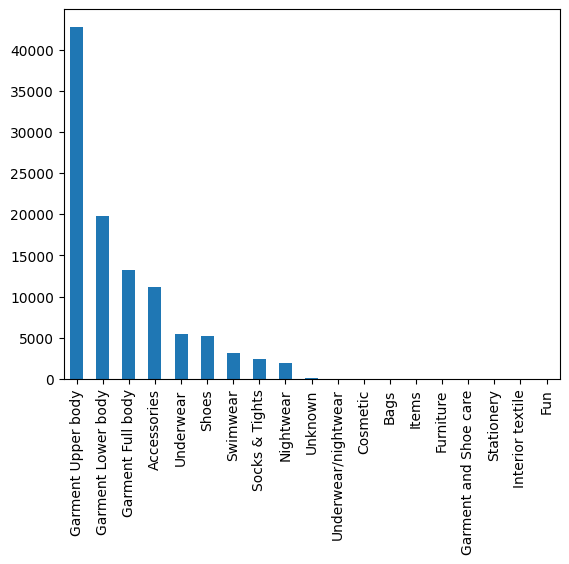

In [17]:
#graph about the distribution of the group of product in the dataset (with the name of the product the graph cannot be read correctly)
articles['product_group_name'].value_counts().plot.bar()

<Axes: >

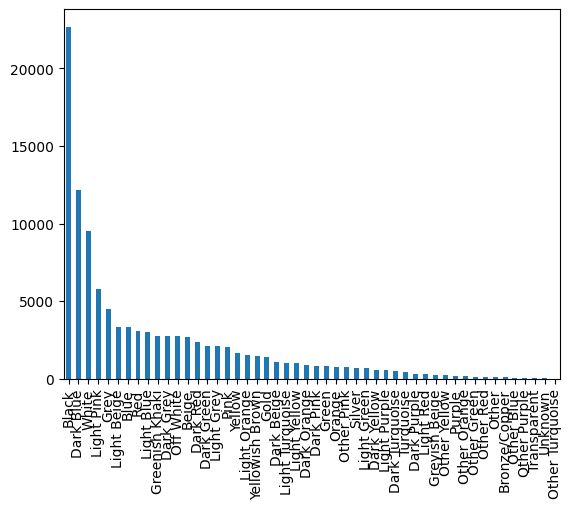

In [18]:
#graph about the distribution of the colour group name distribution
articles['colour_group_name'].value_counts().plot.bar()

<Axes: >

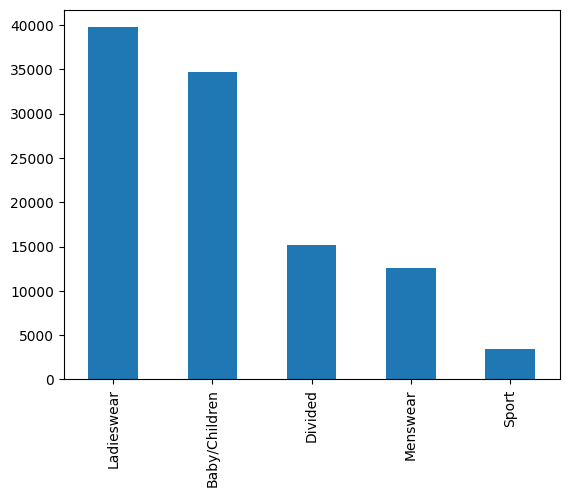

In [19]:
#graph about the distribution of the index group name for the articles in the database
articles['index_group_name'].value_counts().plot.bar()

# Analysis of the dataset 'customers.csv'

## Import of the dataset

In [20]:
#import of the csv file
path_customers = 'gdrive/My Drive/Artificial_intelligence_project_UA/Data/customers.csv'
copyfile(path_customers, 'customers.csv')
customers = pd.read_csv('customers.csv')
customers = pd.DataFrame(customers)

In [21]:
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


## Controls on the data

In [22]:
#control that there is any missing value
customers.isna().any()

customer_id               False
FN                         True
Active                     True
club_member_status         True
fashion_news_frequency     True
age                        True
postal_code               False
dtype: bool

In [23]:
#number of missing values for each column in the dataset
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [24]:
#maximum value of each numerical column in the dataset
customers.max(numeric_only = True)

FN         1.0
Active     1.0
age       99.0
dtype: float64

In [25]:
#minimum value of each numerical column in the dataset
customers.min(numeric_only = True)

FN         1.0
Active     1.0
age       16.0
dtype: float64

In [26]:
#percentage of missing values for the columns with missing values
perc_FN = (customers['FN'].isna().sum()/len(customers))*100
perc_active = (customers['Active'].isna().sum()/len(customers))*100
perc_member = (customers['club_member_status'].isna().sum()/len(customers))*100
perc_fashion = (customers['fashion_news_frequency'].isna().sum()/len(customers))*100
perc_age = (customers['age'].isna().sum()/len(customers))*100

print('The percentage of missing values for the column FN is', perc_FN)
print('The percentage of missing values for the column Active is', perc_active)
print('The percentage of missing values for the column club_member_status is', perc_member)
print('The percentage of missing values for the column  is fashion_news_frequency', perc_fashion)
print('The percentage of missing values for the column age is', perc_age)

The percentage of missing values for the column FN is 65.23783145526903
The percentage of missing values for the column Active is 66.15081852505138
The percentage of missing values for the column club_member_status is 0.44184317555649494
The percentage of missing values for the column  is fashion_news_frequency 1.1668537442236768
The percentage of missing values for the column age is 1.1560664149623172


In [27]:
#control if the customer id is alpha-numeric and if all have the same lenght
len_id = len(customers['customer_id'][0])
same_lenght = True

for customer_id in customers['customer_id']:
    if len(customer_id) != len_id:
        same_length = False
        break

if same_lenght:
    print('All the customer_id have the same length.')
else:
    print('Not all customer_id have the same length.')

All the customer_id have the same length.


In [28]:
#since all the costumer_id have the same lenght, I check that they are all alphanumeric
no_alphanumeric = (customers['customer_id'].str.fullmatch("^[a-z0-9]+$") == False).sum()

print(no_alphanumeric)

0


## Graphs

<Axes: >

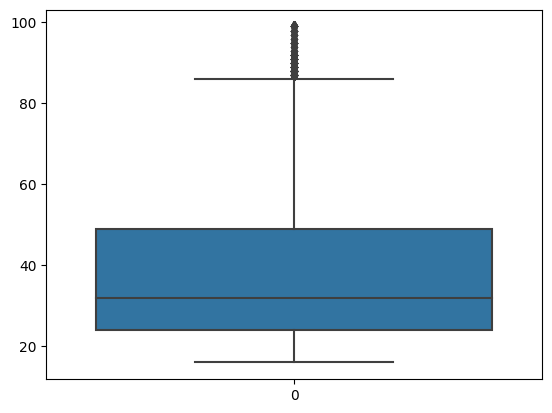

In [29]:
#boxplot about the ages of the customers
sns.boxplot(data = customers['age'])

<Axes: >

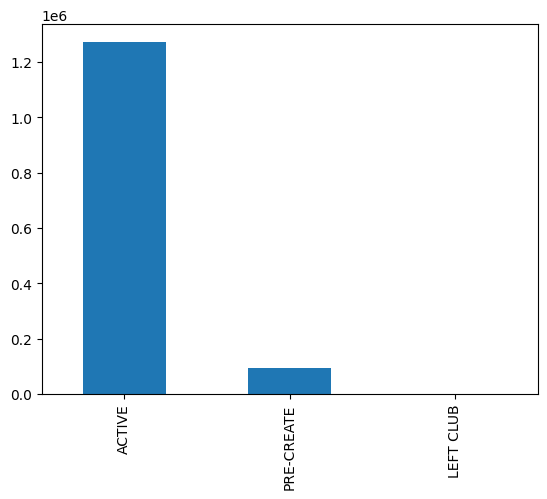

In [30]:
#graph about the distribution of the index group name for the articles in the database
customers['club_member_status'].value_counts().plot.bar()

# Analysis of the dataset 'transactions_train.csv'


## Import of the dataset

In [31]:
#import of the csv file
path_transactions = 'gdrive/My Drive/Artificial_intelligence_project_UA/Data/transactions_train.csv'
copyfile(path_transactions, 'transactions_train.csv')
transactions = pd.read_csv('transactions_train.csv')
transactions = pd.DataFrame(transactions)

In [32]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


## Controls on the data

In [33]:
#control that there is any missing value
transactions.isna().any()

t_dat               False
customer_id         False
article_id          False
price               False
sales_channel_id    False
dtype: bool

In [34]:
#number of missing values for each column in the dataset
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [35]:
#maximum value of each numerical column in the dataset
transactions.max(numeric_only = True)

article_id          9.562170e+08
price               5.915254e-01
sales_channel_id    2.000000e+00
dtype: float64

In [36]:
#minimum value of each numerical column in the dataset
transactions.min(numeric_only = True)

article_id          1.087750e+08
price               1.694915e-05
sales_channel_id    1.000000e+00
dtype: float64

## Comparison with other datasets

In [37]:
#comparison between the customer_id of transactions and customer_id of customers: do they match?
if customers['customer_id'].equals(transactions['customer_id']):
    print("The id of the customers are the same in both the dataframes")
else:
    print("The id of the customers are not the same in both the dataframes")

The id of the customers are not the same in both the dataframes


In [38]:
#comparison between the article_id of transactions and article_id of articles: do they match?
if articles['article_id'].equals(transactions['article_id']):
    print("The id of the articles are the same in both the dataframes")
else:
    print("The id of the articles are not the same in both the dataframes")

The id of the articles are not the same in both the dataframes


In [39]:
#check if there are any customer or product that are duplicated
duplicate_customers = transactions['customer_id'].duplicated().sum()
duplicate_articles = transactions['article_id'].duplicated().sum()

print("The customers id that are duplicated are: ", duplicate_customers)
print("The articles id that are duplicated are: ", duplicate_articles)

The customers id that are duplicated are:  30426043
The articles id that are duplicated are:  31683777
